DIGIT RECOGNIZER USING NUMPY, PANDAS, MATPLOTLIB

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("train.csv")

In [24]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data = np.array(data)

In [26]:
m, n = data.shape
np.random.shuffle(data)

# Reason for shuffling data: The data is sorted by label, so if we split the data into training and test sets without shuffling, the training set may only have labels 0-6, while the test set has only labels 7-9. This will make it impossible to train a model using the training set and then test it using the test set.

In [27]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
# normalize X_dev
X_dev = X_dev / 255.0


In [28]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
# normalize X_train
X_train = X_train / 255.0


In [29]:
def init_params():
    # Returns a dictionary of parameters such as weights and biases
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5

    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2

In [30]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [31]:
def softmax(Z):
    Z = Z - np.max(Z, axis=0)  # Subtract max for numerical stability
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=0)



In [32]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


In [33]:
def convert_labels(Y):
    # Convert 0-9 labels to one-hot format
    one_hot = np.zeros((Y.size, Y.max() + 1))
    one_hot[np.arange(Y.size), Y] = 1
    return one_hot.T

In [34]:
def ReLU_deriv(Z):
    return Z > 0

In [35]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    converted_labels = convert_labels(Y)
    dZ2 = A2 - converted_labels

    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)

    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2



In [36]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2

Applying Gradient Descent

In [39]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    acc = []
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        accuracy: float = np.mean(np.argmax(A2, axis=0) == Y) * 100
        acc.append(accuracy)
        if i % 50 == 0:
            accuracy = np.mean(np.argmax(A2, axis=0) == Y)
            print("Iteration: ", i)
            print("Accuracy: ", accuracy * 100, "%")

    return W1, b1, W2, b2, acc
        

In [40]:
W1, b1, W2, b2, acc = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
Accuracy:  10.607317073170732 %
Iteration:  50
Accuracy:  47.16097560975609 %
Iteration:  100
Accuracy:  60.97073170731707 %
Iteration:  150
Accuracy:  69.18292682926828 %
Iteration:  200
Accuracy:  74.24634146341464 %
Iteration:  250
Accuracy:  77.55853658536586 %
Iteration:  300
Accuracy:  79.88536585365854 %
Iteration:  350
Accuracy:  81.57073170731707 %
Iteration:  400
Accuracy:  82.75121951219512 %
Iteration:  450
Accuracy:  83.72682926829268 %


In [42]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.mean(predictions == Y) / Y.size

In [43]:
def make_predictions(W1, b1, W2, b2, X):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


    

In [44]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(W1, b1, W2, b2, current_image)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [45]:
# Plant the accuracy graph 
# acc = [acc1, acc2, acc3, ...]
def accuracy_graph(acc):
    plt.plot(acc)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.show()

Prediction:  [3]
Label:  3


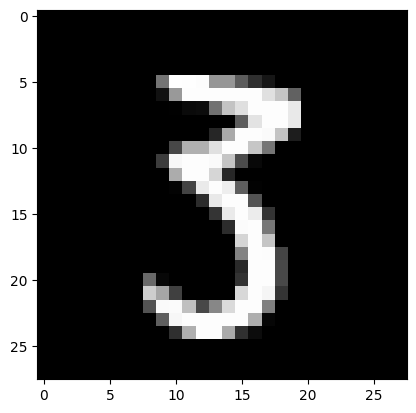

In [51]:
# accuracy_graph(acc)
test_prediction(123, W1, b1, W2, b2)